# MSBA7028 Project code
- Guo Xinglin  

Required packages:  
pandas-1.2.4  
numpy-1.22.3  
matplotlib-3.4.0  
sklearn-0.23.2  
torch:1.11.0+cu113  
lightgbm:3.3.1  
catboost:1.0.3  
d2l:0.17.4  

# 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys, os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import StratifiedShuffleSplit

pd.set_option('display.max_columns',None)

# 2. Read and understand the data

In [2]:
df = pd.read_csv('./Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [5]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,0.102578,0.002620,-0.000365,1.259757e-02,-0.000396,5.601553e-03,124.887709,-145.424643,2808.904199,100.988234,588.795354,-9.995014,374.137619,37.243725,183.911272,-2.009099,143.817714,15.395436,107.784375,-5.823034,98.505164,10.766659,74.795022,-7.569825,74.309310,8.283669,68.803998,-6.504168,63.812684,4.936315,57.790413,-5.186272,57.130389,2.164629,54.069345,-4.175271,52.678281,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,0.045651,0.003614,0.001699,1.263324e-02,0.001108,6.653225e-03,32.911676,106.456350,2596.256821,34.673178,459.705227,23.972522,294.470578,17.804460,133.164251,13.568717,109.272584,12.652512,75.900398,11.088698,65.536682,11.123007,45.881275,9.368422,44.733012,8.841558,41.864203,7.821168,40.218357,7.563187,37.481013,7.132049,35.746539,6.084283,37.715592,5.929457,37.251966,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,0.013525,0.000005,-0.026672,9.312309e-23,-0.008794,4.672045e-08,24.377211,-662.171631,25.190538,-12.053392,9.665931,-104.249832,2.055229,-35.138493,3.540373,-47.886780,9.754141,-34.889263,5.267811,-45.187019,7.561506,-40.323467,6.899100,-39.451752,8.252314,-32.833546,7.584913,-40.008194,4.998892,-23.759195,2.345633,-29.350500,7.806118,-23.390091,3.230073,-30.467087,1.481917,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,0.067290,0.000628,-0.000127,4.086402e-03,-0.000579,1.106077e-03,103.359375,-201.474651,1143.226685,76.043871,270.420326,-26.884581,174.570415,24.450934,88.392767,-11.881086,67.975819,5.759286,53.944843,-14.464527,51.585960,2.528776,42.255037,-14.569940,42.856218,1.734222,40.205816,-12.203228,37.617884,-0.433691,34.455327,-10.352716,34.844897,-1.860355,32.415298,-8.184258,31.237773,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,0.097868,0.001390,-0.000013,8.429785e-03

In [6]:
df = df.drop(['filename','length'],axis = 1)

# 3. Data Preprocessing

Encoding 10 category of music.

In [7]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [8]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
X = df.iloc[:,:-1]

In [10]:
sss = StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=123)

for train_index, test_index in sss.split(df, df["label"]):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

In [11]:
len(y_train)

6993

In [12]:
len(y_test)

2997

The mean of music feature follows normal distribution.

There is slight skewness with the variance of music feature. It is not reasonable to apply logorithms on variance. Therefore, we only apply z scaling on data.

In [14]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
#Use the mean and std from trainning set to do scaling
X_test = (X_test - X_train.mean())/ X_train.std()
X_train = fit.fit_transform(X_train)

In [15]:
X_train = np.array(X_train,dtype = float)
X_test = np.array(X_test,dtype = float)

# 4. Machine Learning

### Validate results using sklearn api

In [23]:
# Default models of lightgbm and catboost
import lightgbm as lgb
import catboost as cat
from sklearn.metrics import accuracy_score, confusion_matrix
for model in [lgb.LGBMClassifier(), cat.CatBoostClassifier()]:
    model.fit(X_train, y_train, verbose=False)
    y_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    print(f'-----{type(model).__name__}')
    print(accuracy_score(train_pred, y_train))
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_pred, y_test))

D:\Anaconda\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


-----LGBMClassifier
0.998998998998999
0.9099099099099099
[[277   0   9   3   1   6   5   0   3   7]
 [  0 285   0   0   0  11   1   0   0   2]
 [  6   1 273   6   2  10   2   2   6   9]
 [  5   0   1 275   6   0   1  11   6  12]
 [  2   0   0   3 279   0   3   7   5   2]
 [  4  11   8   1   1 272   0   3   1   5]
 [  2   0   0   2   2   0 278   0   0   8]
 [  0   0   2   2   4   0   0 267  10   0]
 [  2   0   2   3   2   1   0   4 268   2]
 [  2   2   4   5   2   0  10   6   1 253]]
-----CatBoostClassifier
0.9985699985699986
0.9029029029029029
[[277   0   8   5   0   6   3   0   2   7]
 [  1 285   0   1   0   7   1   1   1   1]
 [  6   0 273   6   2   7   3   2   2  10]
 [  3   0   3 269   4   0   0  14   4  13]
 [  2   0   0   3 274   0   4   6   8   1]
 [  6  12   7   2   0 275   0   1   1   8]
 [  4   0   1   2   1   1 280   0   2  12]
 [  0   0   1   1   8   0   0 264  11   3]
 [  1   0   1   4   8   2   0   7 266   2]
 [  0   2   5   7   2   2   9   5   3 243]]


# 5. Deep Learning

### MLP with pytorch api

In [26]:
import torch
from torch import nn
from d2l import torch as d2l
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Transform array to tensor.

In [27]:
X_train_dl = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_dl = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_dl = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_dl = torch.tensor(y_test, dtype=torch.long).to(device)

In [29]:
def train_MLP(net, loss, X_train, y_train, X_test, y_test, num_epochs, 
              learning_rate, weight_decay, batch_size, optimizer=torch.optim.Adam, 
              plot=False, verbose=False, **kwargs):
        
    train_loss, test_loss = [], []
    train_acc, test_acc = [], []
    train_iter = d2l.load_array((X_train, y_train), batch_size)
    test_iter = d2l.load_array((X_test, y_test), batch_size)
    optimizer = optimizer(net.parameters(), lr=learning_rate, weight_decay=weight_decay, **kwargs)
#     d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)
    if isinstance(net, torch.nn.Module):
        net.train()
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
       
        train_loss.append(loss(net(X_train), y_train))
        train_acc.append(d2l.evaluate_accuracy(net, train_iter))
        test_loss.append(loss(net(X_test), y_test))
        test_acc.append(d2l.evaluate_accuracy(net, test_iter))
        
        if verbose > 0:
            if (epoch + 1) % verbose == 0:
                print(f'Epoch {epoch + 1}:')
                print(f'Current train accurarcy: {train_acc[-1]}, Current test accuracy: {test_acc[-1]}')

    print(f'Final result: train accurarcy: {train_acc[-1]}, test accuracy: {test_acc[-1]}')
    
    if plot:
        plt.plot(np.arange(1, num_epochs+1), test_acc, label='Test accuracy')
        plt.plot(np.arange(1, num_epochs+1), train_acc, label='Train accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
    return train_acc, test_acc, train_loss, test_loss


In [30]:
import gc
gc.collect()
torch.cuda.empty_cache()

Epoch 10:
Current train accurarcy: 0.8073788073788074, Current test accuracy: 0.7600934267600934
Epoch 20:
Current train accurarcy: 0.8760188760188761, Current test accuracy: 0.8071404738071405
Epoch 30:
Current train accurarcy: 0.9229229229229229, Current test accuracy: 0.8331664998331665
Epoch 40:
Current train accurarcy: 0.9548119548119548, Current test accuracy: 0.8448448448448449
Epoch 50:
Current train accurarcy: 0.9755469755469756, Current test accuracy: 0.8571905238571905
Epoch 60:
Current train accurarcy: 0.9874159874159875, Current test accuracy: 0.8665331998665332
Epoch 70:
Current train accurarcy: 0.9952809952809952, Current test accuracy: 0.8661995328661996
Epoch 80:
Current train accurarcy: 0.9974259974259975, Current test accuracy: 0.8722055388722055
Epoch 90:
Current train accurarcy: 0.9975689975689975, Current test accuracy: 0.8788788788788788
Epoch 100:
Current train accurarcy: 0.9982839982839983, Current test accuracy: 0.8752085418752086
Final result: train accurarcy

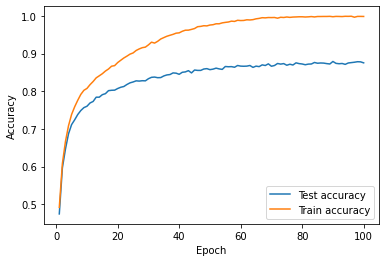

In [31]:
loss = nn.CrossEntropyLoss()
net = nn.Sequential(nn.Flatten(), nn.Linear(X_train_dl.shape[1], 256), nn.ReLU(), nn.Linear(256, 64), nn.ReLU(), nn.Linear(64, 10))

net = net.to(device)
train_acc, test_acc, train_loss, test_loss = train_MLP(net, loss, X_train_dl, y_train_dl, X_test_dl, y_test_dl, 
                                                       num_epochs=100, learning_rate=0.0002, weight_decay=0.0001, batch_size=32, 
                                                       verbose=10, plot=True, optimizer=torch.optim.Adam)

### Sklearn api

In [32]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(512, 32)) 
model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(512, 32))

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(model_mlp.predict(X_test), y_test))
confusion_matrix(model_mlp.predict(X_test), y_test)

0.8892225558892226


array([[277,   0,  12,   4,   4,   5,   2,   1,   2,  10],
       [  1, 285,   0,   4,   1,  10,   1,   1,   0,   2],
       [  7,   1, 262,   1,   3,   9,   7,   5,   2,   8],
       [  2,   0,   2, 261,   5,   1,   2,  11,   3,  14],
       [  0,   0,   0,   8, 263,   1,   3,  10,  12,   2],
       [  5,   8,   7,   0,   0, 268,   0,   0,   0,   5],
       [  4,   0,   0,   6,   3,   0, 281,   0,   1,   7],
       [  0,   0,   4,   2,   8,   3,   0, 262,   5,   4],
       [  4,   0,   2,   5,   7,   0,   1,   8, 272,  14],
       [  0,   5,  10,   9,   5,   3,   3,   2,   3, 234]], dtype=int64)

### LSTM

In [34]:
from torch.autograd import Variable
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, device='cuda:0'):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.batch_size = None
        self.hidden = None
        self.device = device
    
    def forward(self, x):
        h0, c0 = self.init_hidden(x)
#         out, (hn, cn) = self.rnn(x, (h0, c0))
        out, (hn, cn) = self.rnn(x)
#         out = self.fc(out[:, -1, :])
        out = self.fc(out[:, :])
        return out
    
    def init_hidden(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        return [t.to(self.device) for t in (h0, c0)]
    
def train_LSTM(net, loss, X_train, y_train, X_test, y_test, num_epochs=100, 
              learning_rate=0.001, weight_decay=0, batch_size=32, optimizer=torch.optim.Adam, 
              plot=False, verbose=False, **kwargs):
    
    optimizer = optimizer(net.parameters(), lr=learning_rate)
    train_iter = d2l.load_array((X_train, y_train), batch_size)
    test_iter = d2l.load_array((X_test, y_test), batch_size)
    train_loss, test_loss = [], []
    train_acc, test_acc = [], []

    # Train the model
    for epoch in range(num_epochs):
        for X, y in train_iter:
            net.train()
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
            
        train_loss.append(loss(net(X_train), y_train))
        train_acc.append(d2l.evaluate_accuracy(net, train_iter))
        test_loss.append(loss(net(X_test), y_test))
        test_acc.append(d2l.evaluate_accuracy(net, test_iter)) 
        if verbose > 0:
            if (epoch + 1) % verbose == 0:
                print(f'Epoch {epoch + 1}:')
                print(f'Current train accurarcy: {train_acc[-1]}, Current test accuracy: {test_acc[-1]}')
                
    print(f'Final result: train accurarcy: {train_acc[-1]}, test accuracy: {test_acc[-1]}')
    
    if plot:
        plt.plot(np.arange(1, num_epochs+1), test_acc, label='Test accuracy')
        plt.plot(np.arange(1, num_epochs+1), train_acc, label='Train accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
    return train_acc, test_acc, train_loss, test_loss


Epoch 10:
Current train accurarcy: 0.8203918203918203, Current test accuracy: 0.7707707707707707
Epoch 20:
Current train accurarcy: 0.9220649220649221, Current test accuracy: 0.8405071738405072
Epoch 30:
Current train accurarcy: 0.9666809666809667, Current test accuracy: 0.8651985318651986
Epoch 40:
Current train accurarcy: 0.9885599885599886, Current test accuracy: 0.8778778778778779
Epoch 50:
Current train accurarcy: 0.9941369941369942, Current test accuracy: 0.8765432098765432
Final result: train accurarcy: 0.9941369941369942, test accuracy: 0.8765432098765432


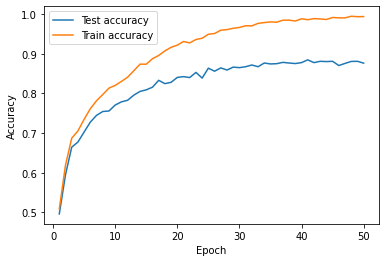

In [35]:
net = LSTM(X_train.shape[1], 128, 2, 10, device).to(device)
train_acc, test_acc, _, _ = train_LSTM(net, loss, X_train_dl, y_train_dl, X_test_dl, y_test_dl, 
                                                       num_epochs=50, learning_rate=0.0005, weight_decay=0.0001, batch_size=32, 
                                                       verbose=10, plot=True, optimizer=torch.optim.Adam)